In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading data


In [6]:
test_data = pd.read_csv('./data/test.csv')
train_data = pd.read_csv('./data/train.csv')

In [7]:
test_df=pd.DataFrame(test_data)
train_df=pd.DataFrame(train_data)

In [10]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking is there any Null values


In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Visualization understading patterns


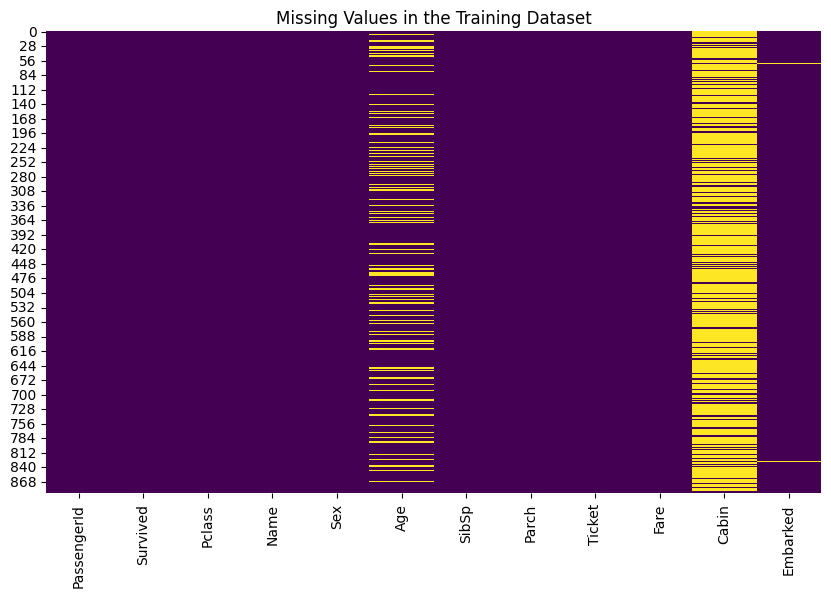

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Training Dataset')
plt.show()

Those YELLOW lines represent missing values in the dataset


C:\Users\LOURDHU RAJU\AppData\Local\Temp\ipykernel_22964\1074165185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='pastel')


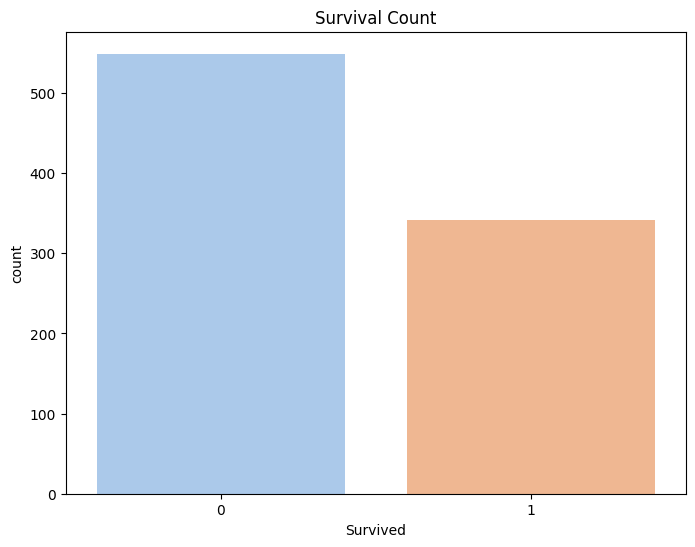

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_df, palette='pastel')
plt.title('Survival Count')
plt.show()


Zero represents NOT-SERVIVED and one represents SERVIVED


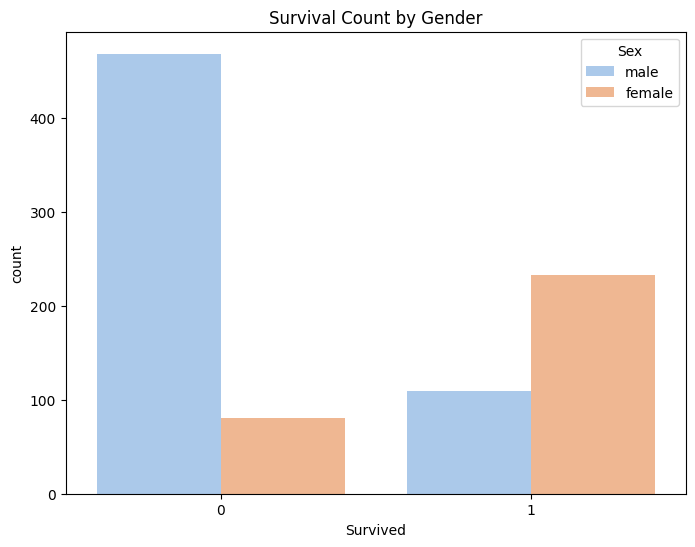

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train_df, palette='pastel')
plt.title('Survival Count by Gender')
plt.show()

We can see FEMALE passengers of survival is high.


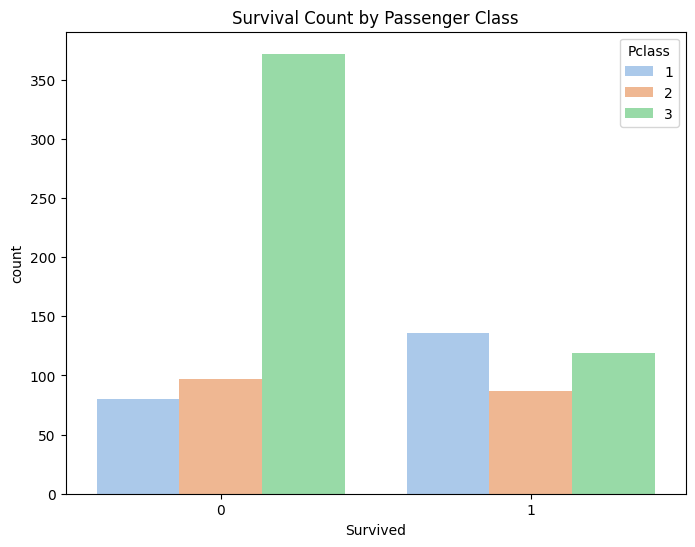

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=train_df, palette='pastel')
plt.title('Survival Count by Passenger Class')
plt.show()

Survuival count of CLASS1 is high


C:\Users\LOURDHU RAJU\AppData\Local\Temp\ipykernel_22964\871864685.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Survived'] == 1]['Age'], shade=True, label='Survived', color='blue')
C:\Users\LOURDHU RAJU\AppData\Local\Temp\ipykernel_22964\871864685.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Survived'] == 0]['Age'], shade=True, label='Not Survived', color='red')


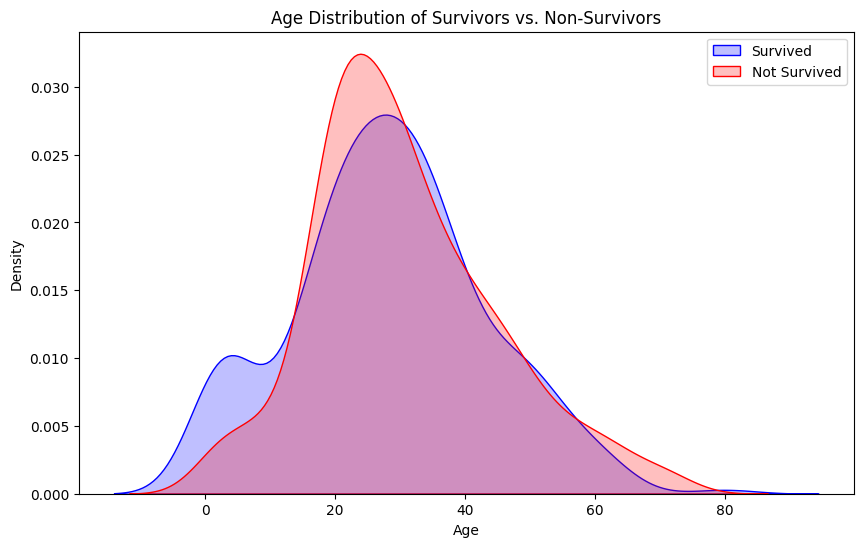

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df[train_df['Survived'] == 1]['Age'], shade=True, label='Survived', color='blue')
sns.kdeplot(train_df[train_df['Survived'] == 0]['Age'], shade=True, label='Not Survived', color='red')
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


People between 20-40 Age has high probability of being survive.


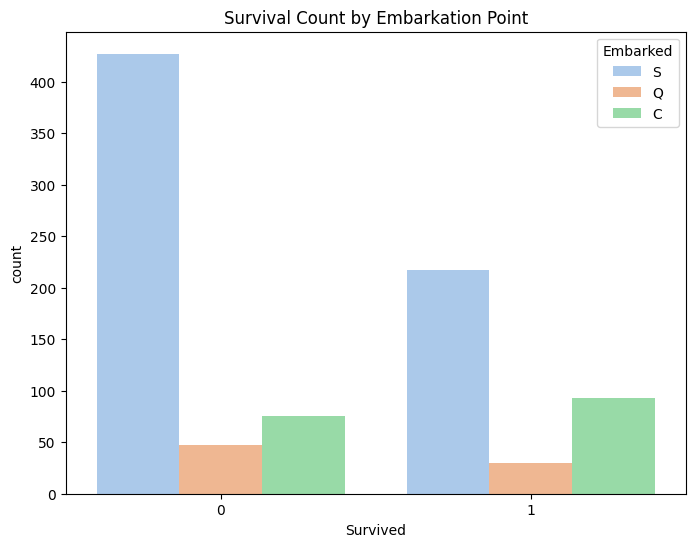

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Embarked', data=train_df, palette='pastel')
plt.title('Survival Count by Embarkation Point')
plt.show()

# Data Cleaning and processing


We can see there are Missing values in Age,Cabin and Embark


In [23]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

In [24]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [25]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

Converting objects into numerical values.


In [26]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [29]:
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


# Selecting Features


In [31]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train_df[features]
y_train = train_df['Survived']
X_test = test_df[features]

# Building and Evaluating the Model


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Splitting data into train and validation sets


In [33]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = model.predict(X_val_split)

# Evaluate the model


In [36]:
accuracy = accuracy_score(y_val_split, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

Validation Accuracy: 0.82


# Making Predictions on the Test Set


In [37]:

test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('titanic_submission.csv', index=False)
